In [83]:
# adjsut the basic logging lovel of notebook
import logging
logging.basicConfig(level=logging.WARNING)

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# local
from auditory_cortex import optimal_input, opt_inputs_dir, area_to_sessions
from auditory_cortex import analysis, utils


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


### Confusion matrix for 'deepspeech2'

In [ ]:
model_name = 'deepspeech2'
# model_name = 'wave2letter_modified'

# correlation object
corr_obj = analysis.Correlations(model_name=model_name+'_'+'opt_neural_delay')
opt_obj = optimal_input.OptimalInput(model_name=model_name, load_features=False)

# read betas...
dirpath = os.path.join(opt_inputs_dir, model_name)
filepath = os.path.join(dirpath, f"{model_name}_beta_bank.pkl")
if os.path.exists(filepath):
    with open(filepath, 'rb') as f:
        beta_bank = pickle.load(f)
        print("Loading file...")
else:
    print(f"Results not saved, check and recompute...!")



In [4]:
len(beta_bank.keys())

18

In [55]:
threshold = 0.068
layer_id = 2

l = opt_obj.get_layer_index(layer_id)
# sessions = ['200213', '180731']
# sessions_list_vertical = sessions
# sessions_list_horizontal = sessions
sessions_list_vertical = beta_bank.keys()
sessions_list_horizontal = beta_bank.keys()
beta_beta_confusion = []
for session1 in sessions_list_vertical:
    beta_beta_row = []
    channels_1 = corr_obj.get_good_channels(session1 ,threshold=threshold)
    beta1 = beta_bank[session1][l].cpu().numpy()

    for session2 in sessions_list_horizontal:
        beta2 = beta_bank[session2][l].cpu().numpy()
        channels_2 = corr_obj.get_good_channels(session2, threshold=threshold)

        beta_beta = np.zeros((len(channels_1), len(channels_2)))
        for i, ch1 in enumerate(channels_1):

            for j, ch2 in enumerate(channels_2):
                beta_beta[i,j] = utils.cc_single_channel(beta1[:,int(ch1)], beta2[:,int(ch2)])
        beta_beta_row.append(beta_beta)

    beta_beta_row =  np.concatenate(beta_beta_row, axis=1)
    beta_beta_confusion.append(beta_beta_row)

beta_beta_confusion = np.concatenate(beta_beta_confusion, axis=0)
    

In [57]:
matrix_filepath = os.path.join(dirpath, f"{model_name}_confusion_matrix_plain.npy")
np.save(matrix_filepath, beta_beta_confusion)
print(f"Confusion matrix saved to file: \n {matrix_filepath}")

Confusion matrix saved to file: 
 /depot/jgmakin/data/auditory_cortex/results/optimal_inputs/deepspeech2/deepspeech2_confusion_matrix_plain.npy


### confusion matrix in a single cell..

In [60]:
threshold = 0.068
# layer_id = 2
# model_name = 'deepspeech2'

# layer_id = 4
# model_name = 'speech2text'

# layer_id = 4
# model_name = 'wave2letter_modified'

layer_id = 7
model_name = 'wave2vec2'

# correlation object
print(f"Creating object for '{model_name}'")
corr_obj = analysis.Correlations(model_name=model_name+'_'+'opt_neural_delay')
opt_obj = optimal_input.OptimalInput(model_name=model_name, load_features=False)

# read betas...
dirpath = os.path.join(opt_inputs_dir, model_name)
filepath = os.path.join(dirpath, f"{model_name}_beta_bank.pkl")
if os.path.exists(filepath):
    with open(filepath, 'rb') as f:
        beta_bank = pickle.load(f)
        print("Loading file...")
else:
    raise FileNotFoundError(f"Results not saved, check and recompute...!")


l = opt_obj.get_layer_index(layer_id)
print(f"layer-{layer_id} corresponds to index-{l}")
# sessions = ['200213', '180731']
# sessions_list_vertical = sessions
# sessions_list_horizontal = sessions
sessions_list_vertical = beta_bank.keys()
sessions_list_horizontal = beta_bank.keys()
beta_beta_confusion = []
for session1 in sessions_list_vertical:
    beta_beta_row = []
    channels_1 = corr_obj.get_good_channels(session1 ,threshold=threshold)
    beta1 = beta_bank[session1][l].cpu().numpy()

    for session2 in sessions_list_horizontal:
        beta2 = beta_bank[session2][l].cpu().numpy()
        channels_2 = corr_obj.get_good_channels(session2, threshold=threshold)

        beta_beta = np.zeros((len(channels_1), len(channels_2)))
        for i, ch1 in enumerate(channels_1):

            for j, ch2 in enumerate(channels_2):
                beta_beta[i,j] = utils.cc_single_channel(beta1[:,int(ch1)], beta2[:,int(ch2)])
        beta_beta_row.append(beta_beta)

    beta_beta_row =  np.concatenate(beta_beta_row, axis=1)
    beta_beta_confusion.append(beta_beta_row)

beta_beta_confusion = np.concatenate(beta_beta_confusion, axis=0)


matrix_filepath = os.path.join(dirpath, f"{model_name}_confusion_matrix_plain.npy")
np.save(matrix_filepath, beta_beta_confusion)
print(f"Confusion matrix saved to file: \n {matrix_filepath}")

Creating object for 'wave2vec2'
Loading Neural data for session: 180810 ... 

DEBUG:urllib3.connectionpool:Resetting dropped connection: huggingface.co
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /facebook/wav2vec2-base-960h/resolve/main/preprocessor_config.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /facebook/wav2vec2-base-960h/resolve/main/tokenizer_config.json HTTP/1.1" 200 0


Done.
Creating regression obj for: 'wave2vec2'


DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /facebook/wav2vec2-base-960h/resolve/main/config.json HTTP/1.1" 200 0
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading file...
layer-7 corresponds to index-0
Confusion matrix saved to file: 
 /depot/jgmakin/data/auditory_cortex/results/optimal_inputs/wave2vec2/wave2vec2_confusion_matrix_plain.npy


### plotting confusion matrix plain...

Text(0.5, 1.0, "'deepspeech2' \n Beta confusion matrix ")

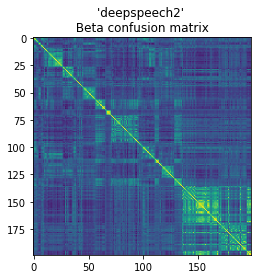

In [76]:
model_name = 'deepspeech2'
# model_name = 'wave2letter_modified'
# read c_matrix...
dirpath = os.path.join(opt_inputs_dir, model_name)
matrix_filepath = os.path.join(dirpath, f"{model_name}_confusion_matrix_plain.npy")
c_matrix = np.load(matrix_filepath)
plt.imshow(c_matrix)
plt.title(f"'{model_name}' \n Beta confusion matrix ")
# plt.xticks([])
# plt.yticks([])


Text(0.5, 1.0, "'wave2letter_modified' \n Beta confusion matrix ")

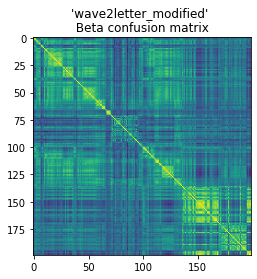

In [77]:
# model_name = 'deepspeech2'
model_name = 'wave2letter_modified'
# read c_matrix...
dirpath = os.path.join(opt_inputs_dir, model_name)
matrix_filepath = os.path.join(dirpath, f"{model_name}_confusion_matrix_plain.npy")
c_matrix = np.load(matrix_filepath)
plt.imshow(c_matrix)
plt.title(f"'{model_name}' \n Beta confusion matrix ")
# plt.xticks([])
# plt.yticks([])


Text(0.5, 1.0, "'speech2text' \n Beta confusion matrix ")

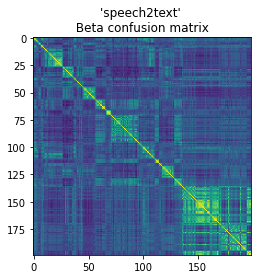

In [78]:
model_name = 'speech2text'
# model_name = 'deepspeech2'
# model_name = 'wave2letter_modified'
# read c_matrix...
dirpath = os.path.join(opt_inputs_dir, model_name)
matrix_filepath = os.path.join(dirpath, f"{model_name}_confusion_matrix_plain.npy")
c_matrix = np.load(matrix_filepath)
plt.imshow(c_matrix)
plt.title(f"'{model_name}' \n Beta confusion matrix ")
# plt.xticks([])
# plt.yticks([])

Text(0.5, 1.0, "'wave2vec2' \n Beta confusion matrix ")

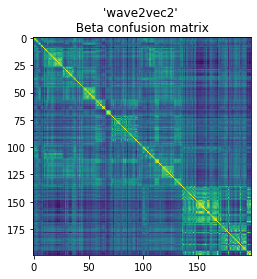

In [79]:
model_name = 'wave2vec2'
# model_name = 'speech2text'
# model_name = 'deepspeech2'
# model_name = 'wave2letter_modified'
# read c_matrix...
dirpath = os.path.join(opt_inputs_dir, model_name)
matrix_filepath = os.path.join(dirpath, f"{model_name}_confusion_matrix_plain.npy")
c_matrix = np.load(matrix_filepath)
plt.imshow(c_matrix)
plt.title(f"'{model_name}' \n Beta confusion matrix ")
# plt.xticks([])
# plt.yticks([])

### outlining sites in black boxes...

Text(0.5, 1.0, "'wave2letter_modified' \n Beta confusion matrix ")

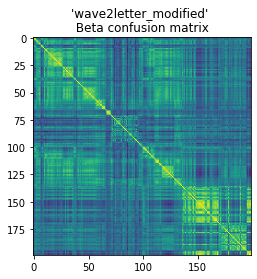

In [80]:
# model_name = 'deepspeech2'
model_name = 'wave2letter_modified'
# read c_matrix...
dirpath = os.path.join(opt_inputs_dir, model_name)
matrix_filepath = os.path.join(dirpath, f"{model_name}_confusion_matrix_plain.npy")
c_matrix = np.load(matrix_filepath)
plt.imshow(c_matrix)
plt.title(f"'{model_name}' \n Beta confusion matrix ")
# plt.xticks([])
# plt.yticks([])

In [81]:
threshold = 0.068

# layer_id = 4
# model_name = 'wave2letter_modified'
# correlation object
print(f"Creating object for '{model_name}'")
corr_obj = analysis.Correlations(model_name=model_name+'_'+'opt_neural_delay')

Creating object for 'wave2letter_modified'


### ordered by distances...

In [173]:
from auditory_cortex import session_to_coordinates

pick_left_most = 0
max_distance = 0.00
for k, v in session_to_coordinates.items():
    # print(v[0])
    distance = v[0]*v[0] + v[1]*v[1]
    if distance > max_distance and v[0] < 0 and v[1] > 0:
        max_distance = distance
        pick_left_most = k

# sort the rest of the session by distance from the left most...
# within core
core_sess_distances = {}
for sess in area_to_sessions['core']:
    v =  session_to_coordinates[sess]
    origin = session_to_coordinates[pick_left_most]
    distance = (origin[0] - v[0])**2 + (origin[1] - v[1])**2
    core_sess_distances[sess] = distance 

### reverse to sort by distances
reverse_dict ={v:k for k,v in core_sess_distances.items()}
distances = list(reverse_dict.keys())
distances.sort()

sorted_distances = {i: reverse_dict[i] for i in distances}

### reverse to get back the session_to_distances
core_sess_distances ={v:k for k,v in sorted_distances.items()}

core_sessions_ordered = np.array(list(core_sess_distances.keys()))

sig_sessions = corr_obj.get_significant_sessions(threshold=threshold)
core_sessions = area_to_sessions['core']
belt_sessions = area_to_sessions['belt']

# sig_core_sessions = sig_sessions[np.isin(sig_sessions, core_sessions)]
sig_belt_sessions = sig_sessions[np.isin(sig_sessions, belt_sessions)]

sig_core_sessions_ordered = core_sessions_ordered[np.isin(core_sessions_ordered, sig_sessions)]


# core_belt_ordered = np.concatenate([sig_core_sessions, sig_belt_sessions], axis=0)
core_belt_ordered = np.concatenate([sig_core_sessions_ordered, sig_belt_sessions], axis=0)

In [177]:
core_belt_ordered

array([180808., 180627., 191206., 180720., 180719., 180731., 200206.,
       180814., 200207., 191125., 180807., 200313., 191113., 200213.,
       191210., 191115., 200205., 191121.])

### save confusion matrices for all networks..

In [181]:
threshold = 0.068
ordered_list_sessions = core_belt_ordered
# layer_id = 2
# model_name = 'deepspeech2'

# layer_id = 4
# model_name = 'speech2text'

# layer_id = 4
# model_name = 'wave2letter_modified'

layer_id = 7
model_name = 'wave2vec2'

# correlation object
print(f"Creating object for '{model_name}'")
corr_obj = analysis.Correlations(model_name=model_name+'_'+'opt_neural_delay')
opt_obj = optimal_input.OptimalInput(model_name=model_name, load_features=False)

# read betas...
dirpath = os.path.join(opt_inputs_dir, model_name)
filepath = os.path.join(dirpath, f"{model_name}_beta_bank.pkl")
if os.path.exists(filepath):
    with open(filepath, 'rb') as f:
        beta_bank = pickle.load(f)
        print("Loading file...")
else:
    raise FileNotFoundError(f"Results not saved, check and recompute...!")


l = opt_obj.get_layer_index(layer_id)
print(f"layer-{layer_id} corresponds to index-{l}")
# sessions = ['200213', '180731']
sessions_list_vertical = ordered_list_sessions
sessions_list_horizontal = ordered_list_sessions
# sessions_list_vertical = beta_bank.keys()
# sessions_list_horizontal = beta_bank.keys()
beta_beta_confusion = []
for session1 in sessions_list_vertical:
    session1 = str(int(session1))
    beta_beta_row = []
    channels_1 = corr_obj.get_good_channels(session1 ,threshold=threshold)
    beta1 = beta_bank[session1][l].cpu().numpy()

    for session2 in sessions_list_horizontal:
        session2 = str(int(session2))
        beta2 = beta_bank[session2][l].cpu().numpy()
        channels_2 = corr_obj.get_good_channels(session2, threshold=threshold)

        beta_beta = np.zeros((len(channels_1), len(channels_2)))
        for i, ch1 in enumerate(channels_1):

            for j, ch2 in enumerate(channels_2):
                beta_beta[i,j] = utils.cc_single_channel(beta1[:,int(ch1)], beta2[:,int(ch2)])
        beta_beta_row.append(beta_beta)

    beta_beta_row =  np.concatenate(beta_beta_row, axis=1)
    beta_beta_confusion.append(beta_beta_row)

beta_beta_confusion = np.concatenate(beta_beta_confusion, axis=0)


matrix_filepath = os.path.join(dirpath, f"{model_name}_confusion_matrix_core_belt_ordered.npy")
np.save(matrix_filepath, beta_beta_confusion)
print(f"Confusion matrix saved to file: \n {matrix_filepath}")

Creating object for 'wave2vec2'
Loading Neural data for session: 180810 ... 

DEBUG:urllib3.connectionpool:Resetting dropped connection: huggingface.co
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /facebook/wav2vec2-base-960h/resolve/main/preprocessor_config.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /facebook/wav2vec2-base-960h/resolve/main/tokenizer_config.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /facebook/wav2vec2-base-960h/resolve/main/config.json HTTP/1.1" 200 0


Done.
Creating regression obj for: 'wave2vec2'


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading file...
layer-7 corresponds to index-0
Confusion matrix saved to file: 
 /depot/jgmakin/data/auditory_cortex/results/optimal_inputs/wave2vec2/wave2vec2_confusion_matrix_core_belt_ordered.npy


### plotting confusion matrix with outlines..

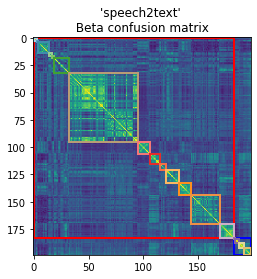

In [188]:
import matplotlib.patches as patches
from palettable.colorbrewer import qualitative
# plt.imshow(mask, cmap=dark12.mpl_colormap)
# model_name = 'deepspeech2'
# model_name = 'wave2letter_modified'
# model_name = 'wave2vec2'
model_name = 'speech2text'

save_fig = True
# read c_matrix...
dirpath = os.path.join(opt_inputs_dir, model_name)
matrix_filepath = os.path.join(dirpath, f"{model_name}_confusion_matrix_core_belt_ordered.npy")
c_matrix = np.load(matrix_filepath)
fig, ax = plt.subplots()
ax.imshow(c_matrix)
ax.set_title(f"'{model_name}' \n Beta confusion matrix ")
lw = 2
# patch of core areas....
rect = patches.Rectangle((0, 0), 183, 183, linewidth = lw, color='r', fill=False)
ax.add_patch(rect)

# patch for belt areas
rect = patches.Rectangle((183, 183), 16, 16, linewidth = lw, color='b', fill=False)
ax.add_patch(rect)

## adding for rest of the sessions...
origin = 0
color_options = qualitative.Paired_12.mpl_colormap
total_session = len(core_belt_ordered)
for s, session in enumerate(core_belt_ordered):
    num_channels = len(corr_obj.get_good_channels(session, threshold=threshold))

    color = qualitative.Paired_12.mpl_colormap(s/total_session)
    rect = patches.Rectangle((origin, origin), num_channels, num_channels, linewidth = lw, color=color, fill=False)
    ax.add_patch(rect)    
    origin = origin + num_channels


# if save_fig:
#     filepath = os.path.join(save)
#     plt.savefig(filepath)

### other...

In [ ]:
dark12.get_mpl_colormap

In [ ]:
from palettable.colorbrewer import qualitative
dark12 = qualitative.Dark2_12

In [125]:
corr_obj.get_corr_score(200206, bin_width=20,
                        delay=0, ch=7, layer=6)

0.3331028122488974

In [126]:
corr_obj.get_corr_score(200206, bin_width=20,
                        delay=0, ch=10, layer=6)

0.4440385538990161

In [128]:
corr_obj.get_corr_score(200206, bin_width=20,
                        delay=0, ch=30, layer=6)

0.460219157616034

In [129]:
corr_obj.get_corr_score(200206, bin_width=20,
                        delay=0, ch=49, layer=6)

0.2230327035575622

### ordering the session by distance...

In [170]:
core_sess_distances

{190726: 0.0,
 190801: 0.0029000000000000007,
 180405: 0.024100000000000045,
 190604: 0.046099999999999995,
 180725: 0.07780000000000001,
 180808: 0.08410000000000006,
 180627: 0.15650000000000006,
 191206: 0.1604000000000001,
 180720: 0.23360000000000003,
 191209: 0.28900000000000003,
 190606: 0.2940999999999999,
 180719: 0.41959999999999986,
 200226: 0.48010000000000014,
 180731: 0.4824999999999999,
 200206: 0.5629000000000002,
 180814: 0.6976000000000001,
 200207: 0.9061,
 191125: 0.9161000000000001,
 180810: 1.2546,
 200610: 1.3421000000000003,
 180807: 1.5568999999999997,
 200313: 1.7620000000000002,
 191113: 1.9625000000000001,
 200213: 2.0936000000000003,
 191212: 2.7941000000000003,
 191002: 3.0773,
 200325: 3.2520999999999995,
 180613: 4.2600999999999996,
 180724: 6.502599999999999,
 180730: 6.617,
 180717: 6.924100000000001,
 180406: 8.721699999999998}

In [160]:
def criteria(item):
    item.value()
core_sess_distances.sort(key=criteria)

AttributeError: 'dict' object has no attribute 'sort'